In [1]:
import pandas as pd
import plotly.graph_objects as go
from PIL import Image
from plotly.subplots import make_subplots

In [2]:
ticker = "BTC-USD"
ticker_printed = ticker.replace("-", "/")

fonts = {"family": "Arial",
        "size": 15
         }

## to get live data from binance:

In [3]:
# from binance import Client
# # obtain and set API credentials
# api_key = apikeys.api_key
# api_secret = apikeys.api_secret
# client = Client(api_key, api_secret, testnet=False)

# klines = client.get_historical_klines("BTCUSDT", Client.KLINE_INTERVAL_1HOUR, "40 day ago CET")
# df = pd.DataFrame(klines)
# df = df.drop(df.columns[[5, 6, 7, 8, 9, 10, 11]], axis=1)
# df[0] = pd.to_datetime(df[0], unit='ms')
# df.columns = ['date', 'open', 'high', 'low', 'close']
# # I've exported such prepared data to csv to show you how it works without a need to connect to binance's API
# df.to_csv('chart_data.csv')

## working on prepared data set...

In [4]:
chart_df = pd.read_csv("chart_data.csv")

## load LONG and SHORT signals to visualise them on a BTC price chart

In [5]:
longs_df = pd.read_csv("longs.csv", decimal=',')
shorts_df = pd.read_csv("shorts.csv", decimal=',')

## let's see our longs' dataframe

In [15]:
copied_longs = longs_df.copy().sort_index(ascending=True)
copied_longs

,LP,sygnał %,Dźwignia x,wartość pozycji w USD,otwarcie pozycji,zamknięcie pozycji,data otwarcia,data zamknięcia,czas otwartej pozycji HH:MM:SS,różnica kursu otwarcie-zamkniecie $,Position change %,PNL $,Cumulative percentage,confidence factor,depozyt początkowy,depozyt aktualny,Cena BTC live,depozyt USD
0,1,"1,00%","10,00","$10,00",20645.0,20890.0,2022-11-07 09:25:00,2022-11-07 21:15:00,11:50:00,▲ $245,"▲ 11,73%","$1,17","$1 001,17",65.42,"$1 000,00",#DIV/0!,17420.5,1000.0
1,2,"1,00%","10,00","$10,03",19543.0,19850.0,2022-11-08 06:21:00,2022-11-08 07:50:00,1:29:00,▲ $307,"▲ 15,47%","$1,55","$1 002,72",74.77,NaN,NaN,NaN,NaN
2,3,"1,00%","10,00","$10,09",19396.0,20650.0,2022-11-08 15:50:00,2022-11-08 17:40:00,1:50:00,▲ $1254,"▲ 60,73%","$6,13","$1 008,85",78.31,NaN,NaN,NaN,NaN
3,4,"1,00%","10,00","$10,15",19363.0,20650.0,2022-11-08 16:27:00,2022-11-08 17:40:00,1:13:00,▲ $1287,"▲ 62,32%","$6,33","$1 015,18",83.64,#DIV/0!,#DIV/0!,NaN,NaN
4,5,"1,00%","10,00","$10,22",19360.0,20650.0,2022-11-08 16:45:00,2022-11-08 17:40:00,0:55:00,▲ $1290,"▲ 62,47%","$6,38","$1 021,56",74.61,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22-12-14 19:50,1077835:50:00,▲ $0,#DIV/0!,#DIV/0!,#DIV/0!,NaN,NaN,NaN,NaN,NaN
105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22-12-14 20:00,1077836:00:00,▲ $0,#DIV/0!,#DIV/0!,#DIV/0!,NaN,NaN,NaN,NaN,NaN
106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22-12-14 20:06,1077836:06:00,▲ $0,#DIV/0!,#DIV/0!,#DIV/0!,NaN,NaN,NaN,NaN,NaN
107,"1,00%","10,00",#DIV/0!,LONG,17616.0,17420.5,2022-12-15 03:13:00,NaN,-1077843:13:00,▼ -$196,"▼ -11,22%",#DIV/0!,#DIV/0!,NaN,NaN,NaN,NaN,NaN


## shorts' dataframe

In [16]:
copied_shorts = shorts_df.copy()
copied_shorts

,LP,sygnał %,Dźwignia x,wartość pozycji w USD,otwarcie pozycji,zamknięcie pozycji,data otwarcia,data zamknięcia,czas otwartej pozycji HH:MM:SS,różnica kursu otwarcie-zamkniecie $,Position change %,PNL $,Cumulative percentage,confidence factor,depozyt początkowy,depozyt aktualny,Cena BTC live,depozyt USD
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,NaN,NaN,NaN,NaN,17309.0,17066.0,2022-12-11 20:11:00,22-12-12 01:06,4:55:00,▲ $243,"▲ 0,00%","$0,00","$0,00",NaN,NaN,NaN,NaN,NaN
108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,NaN,NaN,NaN,NaN,17250.0,18081.0,2022-12-12 22:08:00,22-12-14 19:50,45:42:00,▼ -$831,"▲ 0,00%","$0,00","$0,00",NaN,NaN,NaN,NaN,NaN
110,NaN,NaN,NaN,NaN,17484.0,18326.0,2022-12-13 11:16:00,22-12-14 20:00,32:44:00,▼ -$842,"▲ 0,00%","$0,00","$0,00",NaN,NaN,NaN,NaN,NaN


## and price data

In [17]:
copied_chart = chart_df.copy()
copied_chart

,Unnamed: 0,date,open,high,low,close
0,0,2022-11-05 19:00:00,21291.79,21345.08,21283.39,21331.11
1,1,2022-11-05 20:00:00,21330.58,21380.00,21322.00,21352.42
2,2,2022-11-05 21:00:00,21352.42,21358.83,21321.87,21335.35
3,3,2022-11-05 22:00:00,21335.18,21346.91,21289.29,21296.95
4,4,2022-11-05 23:00:00,21296.17,21315.00,21233.33,21299.37
...,...,...,...,...,...,...
955,955,2022-12-15 14:00:00,17505.46,17550.11,17401.80,17454.83
956,956,2022-12-15 15:00:00,17454.85,17492.37,17374.89,17429.05
957,957,2022-12-15 16:00:00,17428.43,17446.37,17341.77,17398.61
958,958,2022-12-15 17:00:00,17399.54,17443.36,17375.29,17399.32


In [49]:
start_date = copied_chart['date'].iat[0]
end_date = copied_chart['date'].iat[-1]

## let's clean our dataframe and delete fields without opening price data

In [50]:
longs = copied_longs.dropna(subset = ['otwarcie pozycji', 'data otwarcia'])
longs['otwarcie pozycji'].hasnans

False

In [51]:
longs.head()

,LP,sygnał %,Dźwignia x,wartość pozycji w USD,otwarcie pozycji,zamknięcie pozycji,data otwarcia,data zamknięcia,czas otwartej pozycji HH:MM:SS,różnica kursu otwarcie-zamkniecie $,Position change %,PNL $,Cumulative percentage,confidence factor,depozyt początkowy,depozyt aktualny,Cena BTC live,depozyt USD
0,1,"1,00%","10,00","$10,00",20645.0,20890.0,2022-11-07 09:25:00,2022-11-07 21:15:00,11:50:00,▲ $245,"▲ 11,73%","$1,17","$1 001,17",65.42,"$1 000,00",#DIV/0!,17420.5,1000.0
1,2,"1,00%","10,00","$10,03",19543.0,19850.0,2022-11-08 06:21:00,2022-11-08 07:50:00,1:29:00,▲ $307,"▲ 15,47%","$1,55","$1 002,72",74.77,NaN,NaN,NaN,NaN
2,3,"1,00%","10,00","$10,09",19396.0,20650.0,2022-11-08 15:50:00,2022-11-08 17:40:00,1:50:00,▲ $1254,"▲ 60,73%","$6,13","$1 008,85",78.31,NaN,NaN,NaN,NaN
3,4,"1,00%","10,00","$10,15",19363.0,20650.0,2022-11-08 16:27:00,2022-11-08 17:40:00,1:13:00,▲ $1287,"▲ 62,32%","$6,33","$1 015,18",83.64,#DIV/0!,#DIV/0!,NaN,NaN
4,5,"1,00%","10,00","$10,22",19360.0,20650.0,2022-11-08 16:45:00,2022-11-08 17:40:00,0:55:00,▲ $1290,"▲ 62,47%","$6,38","$1 021,56",74.61,NaN,NaN,NaN,NaN


In [52]:
shorts = copied_shorts.dropna(subset = ['otwarcie pozycji', 'data otwarcia'])
shorts['otwarcie pozycji'].hasnans

False

In [53]:
shorts.head()

,LP,sygnał %,Dźwignia x,wartość pozycji w USD,otwarcie pozycji,zamknięcie pozycji,data otwarcia,data zamknięcia,czas otwartej pozycji HH:MM:SS,różnica kursu otwarcie-zamkniecie $,Position change %,PNL $,Cumulative percentage,confidence factor,depozyt początkowy,depozyt aktualny,Cena BTC live,depozyt USD
86,1.0,"1,00%",10.0,"$0,00",16680.0,16395.0,2022-11-26 02:15:00,22-11-26 23:45,NaN,▲ $285,"▲ 0,00%","$0,00","$0,00",NaN,NaN,NaN,NaN,NaN
89,1.0,"1,00%",10.0,"$0,00",16480.0,16355.0,2022-11-29 05:42:00,22-11-29 16:00,NaN,▲ $125,"▲ 0,00%","$0,00","$0,00",NaN,NaN,NaN,NaN,NaN
90,2.0,"1,00%",10.0,"$0,00",16510.0,16355.0,2022-11-29 07:53:00,22-11-29 16:00,NaN,▲ $155,"▲ 0,00%","$0,00","$0,00",NaN,NaN,NaN,NaN,NaN
91,NaN,NaN,NaN,NaN,16680.0,16395.0,2022-11-26 02:15:00,22-11-26 23:45,21:30:00,▲ $285,"▲ 0,00%","$0,00",#VALUE!,NaN,NaN,NaN,NaN,NaN
94,NaN,NaN,NaN,NaN,16480.0,16355.0,2022-11-29 05:42:00,22-11-29 16:00,10:18:00,▲ $125,"▲ 0,00%","$0,00","$0,00",NaN,NaN,NaN,NaN,NaN


## allright, let's plot BTC price action

In [54]:
figure = make_subplots(rows=1, cols=1, shared_xaxes=True)
figure.add_trace(go.Candlestick(x=copied_chart["date"],
                                    open=copied_chart["open"],
                                    high=copied_chart["high"],
                                    low=copied_chart["low"],
                                    close=copied_chart["close"]),
                     row=1, col=1)

figure.update_layout(autotypenumbers='convert types')

## and make our plot prettier


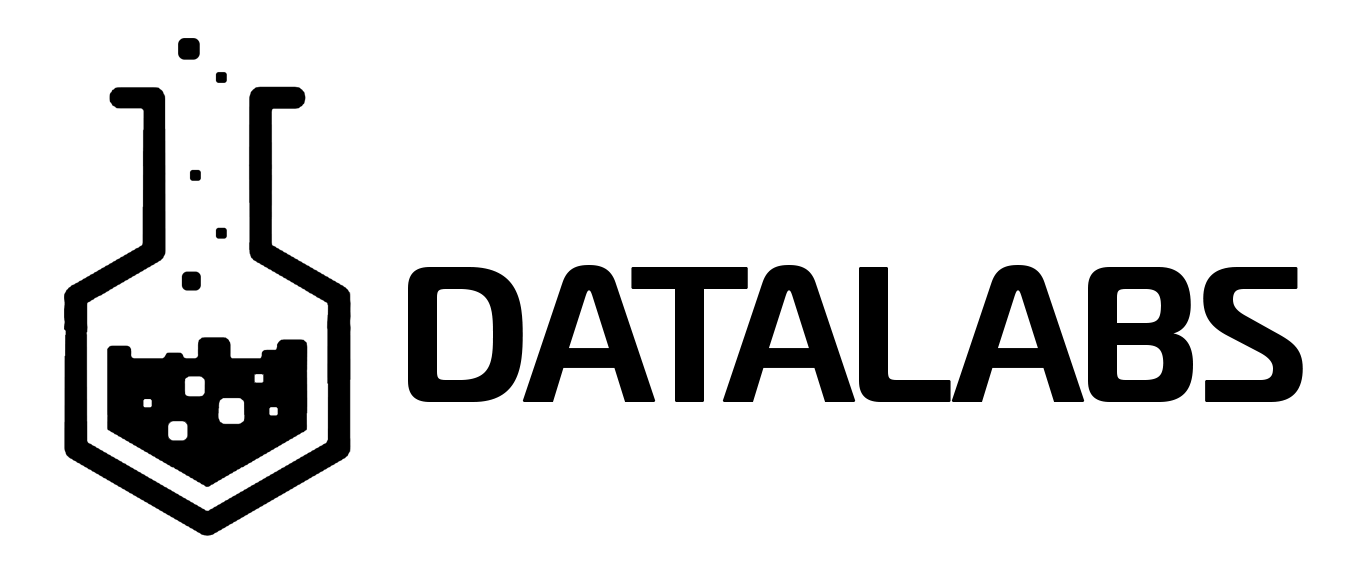

In [55]:
try:
    datalabs_img = Image.open("dl.png")
except FileNotFoundError:
    pass
else:
    figure.add_layout_image(
        dict(
            source=datalabs_img,
            xref="paper",
            yref="paper",
            x=0.5,
            y=0.45,
            sizex=0.8,
            sizey=0.8,
            sizing="contain",
            opacity=0.04,
            xanchor='center',
            yanchor='bottom',
            layer="above")
    )
figure.update_yaxes(title_font=dict(size=10))
figure.update_annotations(font_size=8, align='left', xanchor="left", xref='paper', x=0, yref='paper', yanchor="top")
figure.update_layout(height=700, width=900, title=f"{ticker_printed} • 1H • DATALABS.ME • {start_date} - {end_date}",
                     title_x=0.5,
                     xaxis_rangeslider_visible=False,
                     plot_bgcolor="#fff",
                     showlegend=False,
                     title_font=fonts,
                     margin=dict(l=12, r=12, t=65, b=10),
                     yaxis=dict(side="left", tickfont=dict(size=10, color='lightgrey')),
                     yaxis2=dict(side="right", tickfont=dict(size=8, color='lightgrey')),
                     yaxis3=dict(side="right", tickfont=dict(size=8, color='lightgrey')),
                     yaxis4=dict(side="right", tickfont=dict(size=8, color='lightgrey')),
                     xaxis4=dict(tickfont=dict(size=10, color='lightgrey'))
                     )


## plot it with LONG signals


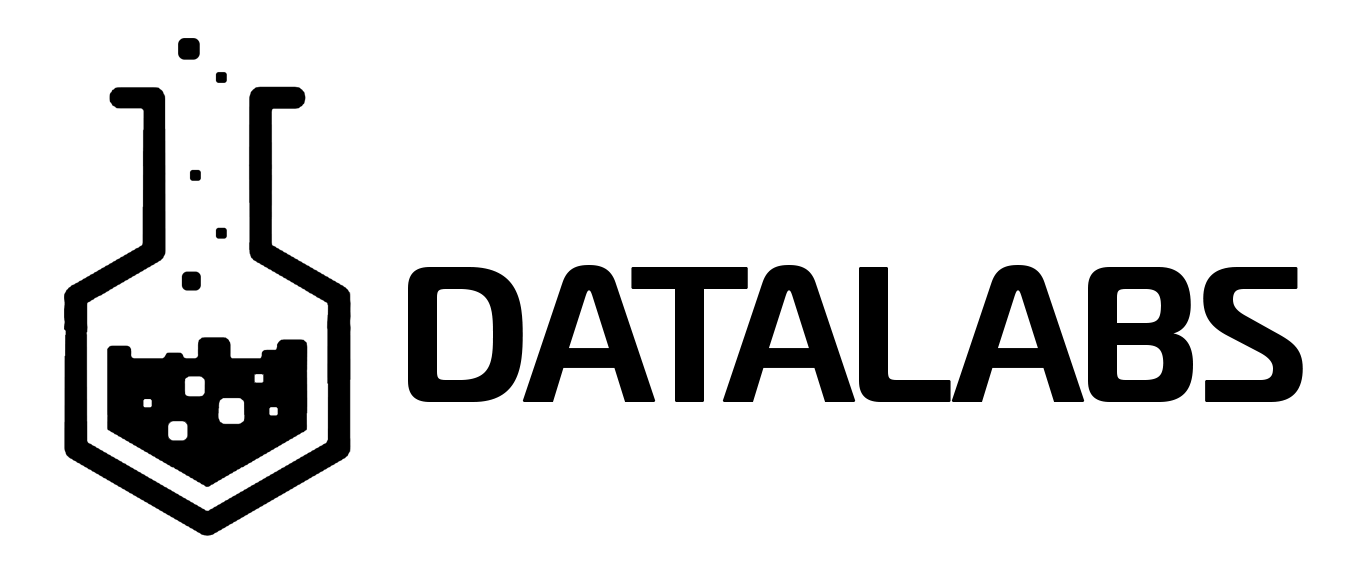

In [56]:
figure.add_trace(go.Scatter(x=longs['data otwarcia'],
                                    y=longs['otwarcie pozycji'],
                                    mode="markers",
                                    name='BUY',
                                    marker={'color': 'green', 'size': 12, 'opacity': 0.9, 'symbol': 'triangle-up'}),row=1, col=1)

## and with SHORT signals


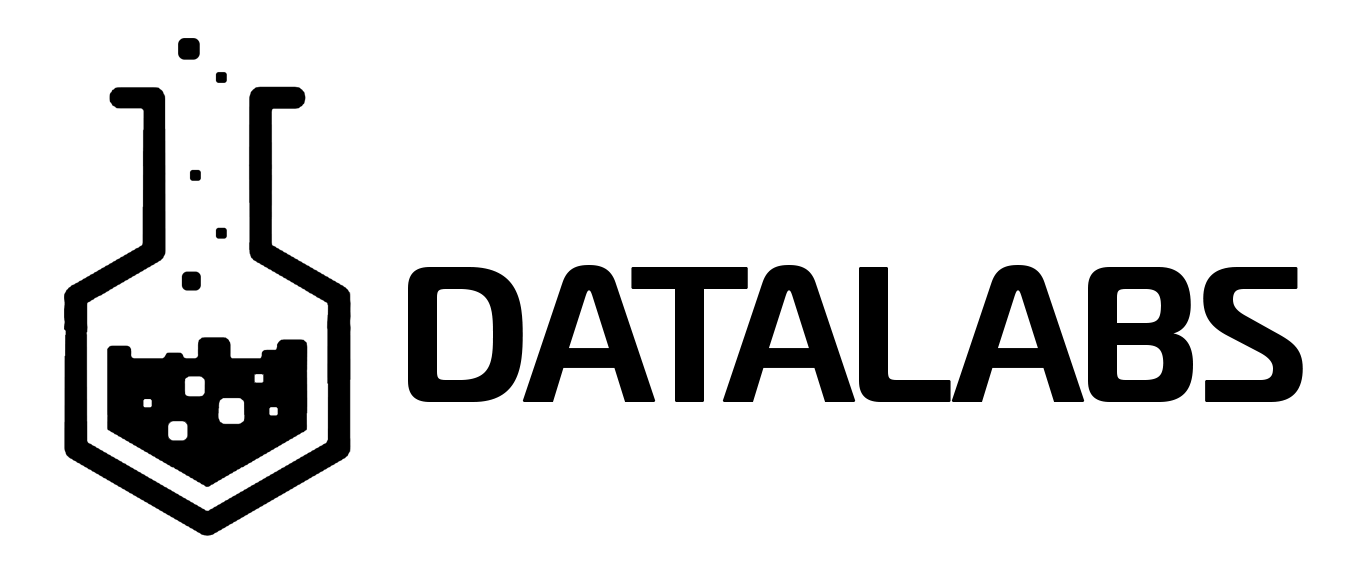

In [57]:
figure.add_trace(go.Scatter(x=shorts['data otwarcia'],
                                    y=shorts['otwarcie pozycji'],
                                    mode="markers",
                                    name='SELL',
                                    marker={'color': 'red', 'size': 12, 'opacity': 0.9, 'symbol': 'triangle-down'}),row=1, col=1)

## now we can just save our chart as html website and send it to our coworker or even host it online

In [58]:
figure.write_html("datalabs.html")